<a href="https://colab.research.google.com/github/kevinhc2/GDP_Growth_Predictor/blob/main/GDP_Growth_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing required modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

Mounted at /content/drive


Reading data in

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Quarter 1 ML Project/Unprocessed Data/WDI_2012-2021_data.csv")

Dropping instances with missing value for class attribute

In [ ]:
droppable = []
for i in range(len(df.index)):
  if pd.isnull(df.iloc[i]["GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]"]):
    droppable.append(i)
df = df.drop(droppable)

Dropping irrelevant attributes like country name and code

In [ ]:
useless = ["Time", "Time Code", "Country Name", "Country Code"]
df = df.drop(useless, axis=1)

Remove derivable attributes

In [ ]:
#'GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]',
# 'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]'
# 'Population density (people per sq. km of land area) [EN.POP.DNST]'
derivable = ['GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]', 'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]', 'Population density (people per sq. km of land area) [EN.POP.DNST]']
df.drop(derivable, axis=1)

Get rid of instances missing a lot of attributes

In [ ]:
# If > 75%, drop instance
miss_val_count = df.isnull().sum()/len(df)*100
attr_names = df.columns
droppable_attrs = []
for i in range(len(df.columns)):
  if miss_val_count[i] > 75:
    droppable_attrs.append(attr_names[i])
for attr in droppable_attrs:
  df = df.drop(attr, axis=1)

Filling in missing values

In [ ]:
for i in range(len(df.columns)):
  df[df.columns[i]].fillna(df[df.columns[i]].mean(), inplace=True)

Discretizing class attribute

In [ ]:
df["GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]"] = np.digitize(df["GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]"], bins=[0])

(Creating .csv file for preprocessed data)

In [ ]:
df.to_csv('preprocessed.csv')

Get rid of outliers

In [ ]:
#Z-Score Method
from scipy import stats
print(len(df.index))
df = df[(np.abs(stats.zscore(df)) < 6).all(axis=1)]
print(len(df.index))
sums =0
for a in df['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']:
  if a ==1:
    sum++
print(len(df['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]'] == 1))
print(len(df['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]'] == 0))

1825
1654
1654
1654


Train/Test Split

In [ ]:
y = df.iloc[:, df.columns == 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']
X = df.loc[:, df.columns != 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size= 0.2)
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

Scale data

In [ ]:
from sklearn.preprocessing import StandardScaler
names = X_train.columns
sc = StandardScaler()
X_train_norm = pd.DataFrame(sc.fit_transform(X_train), columns=names)
X_test_norm = pd.DataFrame(sc.transform(X_test), columns=names)

Normalizing data

In [ ]:
scaler = MinMaxScaler()
names = X_train.columns

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=names)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=names)
copy1 = X_train_norm
copy2 = X_test_norm
print(names)

In [ ]:
X_train_norm = copy1
X_test_norm = copy2

Attribute Selection

1.   Pearson Coefficent
2.   Chi-Squared Test
3. Information Gain (Entropy in Decision Trees)
4. Random Forests
5. Intuition

Pearson Coefficent

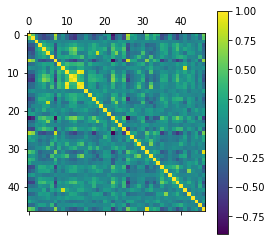

Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]
GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]
GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]
GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]
Surface area (sq. km) [AG.SRF.TOTL.K2]
Urban population growth (annual %) [SP.URB.GROW]
38


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#Pearson Coefficent
corr_matrix = X_train_norm.corr(method='pearson')
plt.matshow(corr_matrix)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

corr_matrix = corr_matrix.abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
for attr in to_drop:
  print(attr)
print(len(X_train_norm.columns)-len(to_drop))

Chi-Squared

In [ ]:
#Chi-Squared
# X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=30)
chi_selector.fit(X_train_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train_norm.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
for f in chi_feature:
  print(f)
to_drop = []
for attr in X_train_norm.columns:
  if attr not in chi_feature and attr != "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]":
    to_drop.append(attr)
print(len(X_train_norm.columns)-len(to_drop))

30 selected features
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]
Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]
Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]
External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]
Forest area (sq. km) [AG.LND.FRST.K2]
GDP (current US$) [NY.GDP.MKTP.CD]
GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]
GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]
GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]
Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]
Military expendit

Information gain

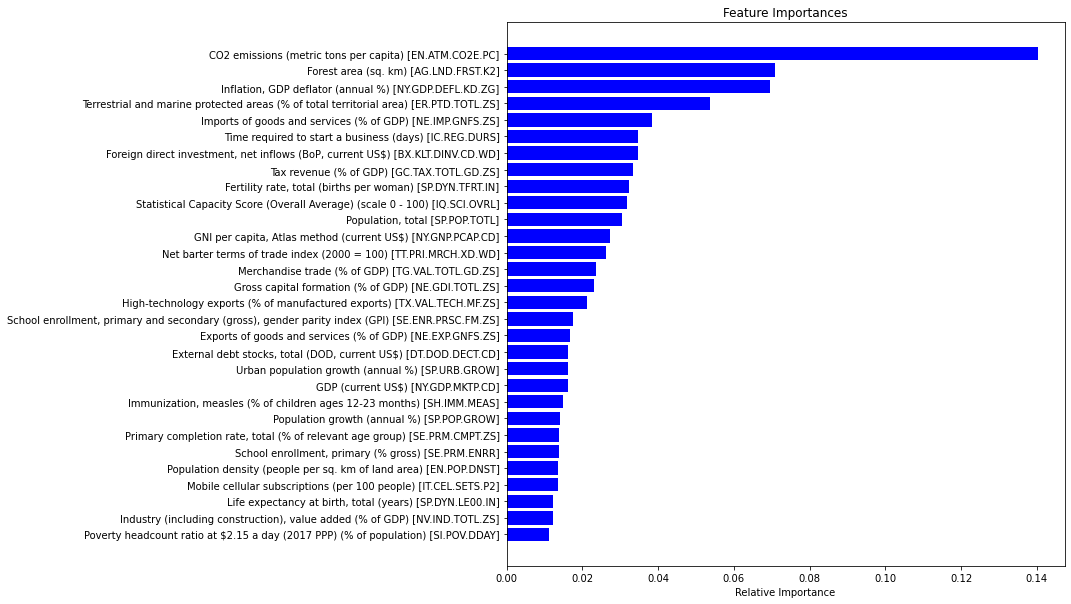

30


In [ ]:
#Info gain decision tree model
model = DecisionTreeClassifier(criterion='entropy')
X_dummies = pd.get_dummies(X_train_norm)
model.fit(X_dummies, y_train)
features = X_dummies.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]  # top 30 features
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
relevant = [features[i] for i in indices]
to_drop = []
for attr in X_train_norm.columns:
  if attr not in relevant and attr != "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]":
    to_drop.append(attr)
print(len(X_train_norm.columns)-len(to_drop))

Random Forest

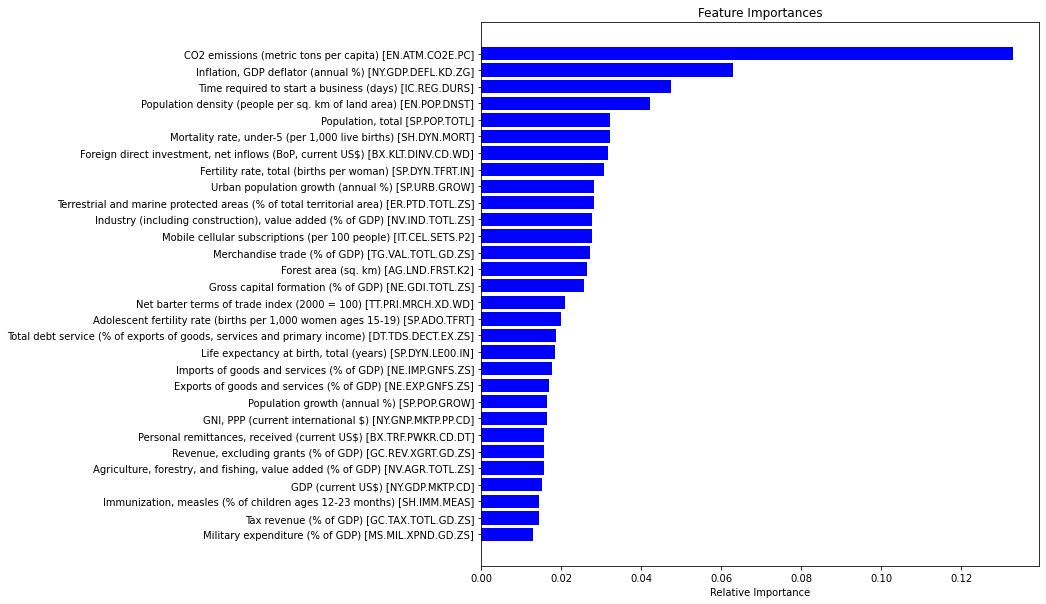

30


In [ ]:
#Random Forest Regressor for dimensionality reduction
model = RandomForestRegressor(random_state=1, max_depth=10)
X_dummies = pd.get_dummies(X_train_norm)
model.fit(X_dummies, y_train.values.ravel())
features = X_dummies.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]  # top 30 features
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
to_drop = []
relevant = [features[i] for i in indices]
for attr in X_train_norm.columns:
  if attr not in relevant and attr != "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]":
    to_drop.append(attr)
print(len(X_train_norm.columns)-len(to_drop))

Intuition

In [ ]:
keep_list = ["CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]",
              'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
              'Forest area (sq. km) [AG.LND.FRST.K2]',
              'Population growth (annual %) [SP.POP.GROW]',
              'Surface area (sq. km) [AG.SRF.TOTL.K2]',
       'High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS]',
       'Income share held by lowest 20% [SI.DST.FRST.20]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Urban population growth (annual %) [SP.URB.GROW]',
       'Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]',
       'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]']
to_drop = []
for attr in X_train_norm.columns:
  if attr not in keep_list and attr != "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]":
    to_drop.append(attr)
print(str(len(X_train_norm.columns)-len(to_drop)), "selected features")
for a in keep_list:
  print(a)

11 selected features
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]
Forest area (sq. km) [AG.LND.FRST.K2]
Population growth (annual %) [SP.POP.GROW]
Surface area (sq. km) [AG.SRF.TOTL.K2]
High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS]
Income share held by lowest 20% [SI.DST.FRST.20]
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]
Urban population growth (annual %) [SP.URB.GROW]
Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]


Feature Reduction

In [ ]:
X_train_fr = X_train_norm.drop(to_drop, axis=1, inplace=False)
X_test_fr = X_test_norm.drop(to_drop, axis=1, inplace=False)
print(len(X_train_fr.columns))
print(len(X_test_fr.columns))

11
11


Classification Algorithms
1. Naive bayes
2. Decision tree
3. Support Vector Machine (SVM)
4. MLP Classifier

Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_fr, y_train.values.ravel()).predict(X_test_fr)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_mlp = accuracy_score(y_test, y_pred)
print ('accuracy:', acc_mlp)
print('f1 score:', metrics.f1_score(y_test, y_pred))

#roc/auc
y_score = gnb.fit(X_train_fr, y_train.values.ravel()).predict_proba(X_test_fr)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()
print('auc:', metrics.auc(fpr, tpr))

NameError: ignored

Decision Tree

[[ 39  35]
 [ 38 253]]
accuracy: 0.8
f1 score: 0.8739205526770293


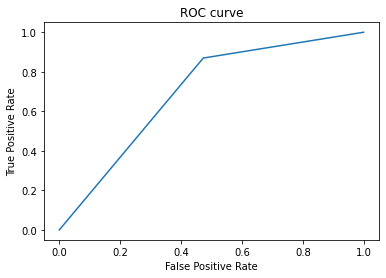

auc: 0.6982214172935822


In [ ]:
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X_train_fr,y_train)
y_pred = clf.predict(X_test_fr)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_mlp = accuracy_score(y_test, y_pred)
print ('accuracy:', acc_mlp)
print('f1 score:', metrics.f1_score(y_test, y_pred))

#roc/auc
y_score = clf.fit(X_train_fr, y_train).predict_proba(X_test_fr)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()
print('auc:', metrics.auc(fpr, tpr))

Support Vector Machine (SVM)

[[ 30  44]
 [ 27 264]]
accuracy: 0.8054794520547945
f1 score: 0.8814691151919866


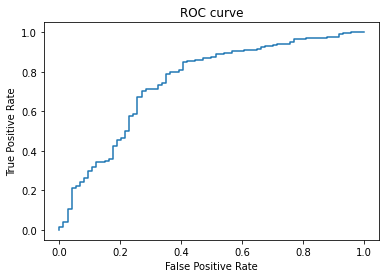

auc: 0.7470047366954582


In [ ]:
clf = svm.SVC(kernel = 'rbf', random_state = 0, C=100, gamma=10)
clf.fit(X_train_fr, y_train.values.ravel())
y_pred = clf.predict(X_test_fr)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_mlp = accuracy_score(y_test, y_pred)
print ('accuracy:', acc_mlp)
print('f1 score:', metrics.f1_score(y_test, y_pred))
y_score = clf.fit(X_train_fr, y_train.values.ravel()).decision_function(X_test_fr)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()
print('auc:', metrics.auc(fpr, tpr))

MLP Classifier

[[  9  65]
 [  5 286]]
accuracy: 0.8082191780821918
f1 score: 0.8909657320872273


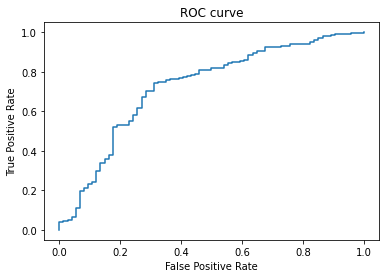

auc: 0.7236463267391102


In [ ]:
from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(alpha=1, max_iter=1000, random_state = 5)
# hidden_layer_sizes=(150,100,50),
mlp = MLPClassifier(max_iter=1000, activation = 'relu', solver='adam', random_state=0)
mlp.fit(X_train_fr, y_train.values.ravel())
y_pred_mlp = mlp.predict(X_test_fr)
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print ('accuracy:', acc_mlp)
print('f1 score:', metrics.f1_score(y_test, y_pred_mlp))

#roc/auc
y_score = mlp.fit(X_train_fr, y_train.values.ravel()).predict_proba(X_test_fr)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()
print('auc:', metrics.auc(fpr, tpr))